Epoch 10/100, Loss: 0.1438
Epoch 20/100, Loss: 0.1435
Epoch 30/100, Loss: 0.1382
Epoch 40/100, Loss: 0.1352
Epoch 50/100, Loss: 0.1400
Epoch 60/100, Loss: 0.1402
Epoch 70/100, Loss: 0.1349
Epoch 80/100, Loss: 0.1339
Epoch 90/100, Loss: 0.1389
Epoch 100/100, Loss: 0.1338


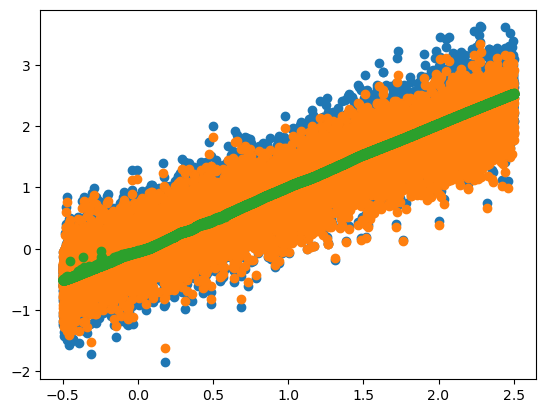

In [1]:
import os
import sys

import matplotlib.pyplot as plt
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *

# Assuming you have already generated `X`, `y_obs`, and `obs_noise_std`

n_samples = 20000
X = np.random.uniform(-.5, 2.5, (n_samples, 1))  # Example covariate (replace with your data)
  # Noisy observations
obs_noise_std = np.random.uniform(0.1, 0.5, n_samples)  # Varying noise levels
y_obs = X.squeeze()  + np.random.normal(0, obs_noise_std )
# Call the function
res = emdn_posterior_means(X, y_obs, obs_noise_std, n_epochs=100, n_gaussians=5, hidden_dim=64)
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( y_obs, obs_noise_std)
# posterior_means now contains the posterior means for the observations
  # Print the first 5 posterior means
plt.scatter(X.squeeze(), y_obs, label='Y obs' )
plt.scatter(X.squeeze(),res_ash.post_mean, label='post mean ash' )
plt.scatter(X.squeeze(),res.post_mean, label='post mean mdn' )



In [2]:

mse_noisy = np.mean(( y_obs- X.squeeze())**2)
mse_ash = np.mean (( res_ash.post_mean - X.squeeze())**2)
mse_true = np.mean((res.post_mean - X.squeeze())**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")

 


Mean Squared Error:
MSE (Est Post vs Y Noisy): 0.1037
MSE (Ash Post vs Y True): 0.0947
MSE (Est Post vs Y True): 0.0009


In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *

n_samples = 20000
y = np.random.uniform(-.5, 2.5, n_samples)
X = y.reshape(-1, 1)  # Reshape y into a 2D array (n_samples, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = np.random.normal(1, scale=0.5)
    else:
        xtrue[i] = np.random.normal(-1, scale=0.5)

obs_noise_std = np.random.uniform(0.5,  1.5, len(xtrue))  # Varying noise levels
# Generate x (noisy observations)
x = xtrue + np.random.normal(0, obs_noise_std, len(xtrue))

# Call the compute_posterior_means function (note the reshaped X=y.reshape(-1, 1))
res = emdn_posterior_means(X=X, betahat=x, sebetahat=obs_noise_std,n_layers=10,
                           n_epochs=1050, n_gaussians=10, hidden_dim=64, lr=0.00001)



Epoch 10/1050, Loss: 1.7996
Epoch 20/1050, Loss: 1.7829
Epoch 30/1050, Loss: 1.7058
Epoch 40/1050, Loss: 1.6599
Epoch 50/1050, Loss: 1.6277
Epoch 60/1050, Loss: 1.5884
Epoch 70/1050, Loss: 1.5477
Epoch 80/1050, Loss: 1.5356
Epoch 90/1050, Loss: 1.5296
Epoch 100/1050, Loss: 1.5261
Epoch 110/1050, Loss: 1.5234
Epoch 120/1050, Loss: 1.5198
Epoch 130/1050, Loss: 1.5181
Epoch 140/1050, Loss: 1.5179
Epoch 150/1050, Loss: 1.5153
Epoch 160/1050, Loss: 1.5139
Epoch 170/1050, Loss: 1.5143
Epoch 180/1050, Loss: 1.5135
Epoch 190/1050, Loss: 1.5141
Epoch 200/1050, Loss: 1.5131
Epoch 210/1050, Loss: 1.5123
Epoch 220/1050, Loss: 1.5126
Epoch 230/1050, Loss: 1.5119
Epoch 240/1050, Loss: 1.5111
Epoch 250/1050, Loss: 1.5110
Epoch 260/1050, Loss: 1.5111
Epoch 270/1050, Loss: 1.5124
Epoch 280/1050, Loss: 1.5124
Epoch 290/1050, Loss: 1.5109
Epoch 300/1050, Loss: 1.5116
Epoch 310/1050, Loss: 1.5105
Epoch 320/1050, Loss: 1.5108
Epoch 330/1050, Loss: 1.5105
Epoch 340/1050, Loss: 1.5107
Epoch 350/1050, Loss: 1

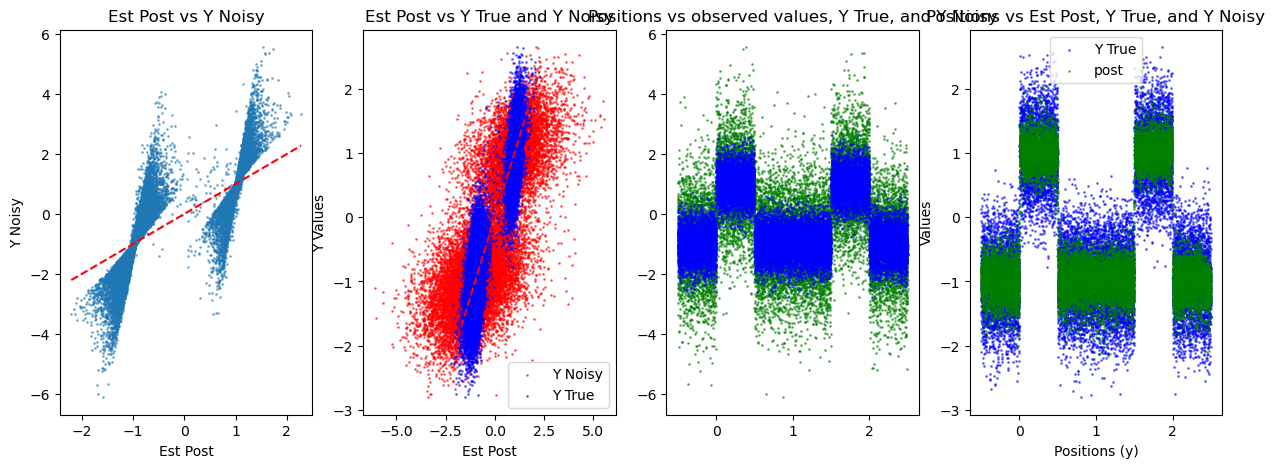

In [20]:
est_post= res.post_mean

plt.figure(figsize=(15, 5))

# Plot 1: Est Post vs Y Noisy
plt.subplot(1, 4, 1)
plt.scatter(est_post, x, alpha=0.5, s=1)
plt.title('Est Post vs Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Noisy')
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 2: Est Post vs Y True
plt.subplot(1, 4, 2)
plt.scatter(x, xtrue, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(est_post, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
plt.title('Est Post vs Y True and Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Values')
plt.legend()
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 3: Positions vs Est Post, Y True, and Y Noisy
plt.subplot(1, 4, 3)
#plt.scatter(y, y_n_np, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
#plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.title('Positions vs observed values, Y True, and Y Noisy')
plt.subplot(1,4,4)
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')

plt.scatter(y, est_post, alpha=0.5, s=1, label='post', color='green')
plt.title('Positions vs Est Post, Y True, and Y Noisy')
plt.xlabel('Positions (y)')
plt.ylabel('Values')
plt.legend()

In [21]:
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( x, np.full(x .shape[0],1))
mse_noisy = np.mean((xtrue - x)**2)
mse_ash = np.mean (( res_ash.post_mean - xtrue)**2)

mse_true = np.mean((est_post - xtrue)**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")



Mean Squared Error:
MSE (Est Post vs Y Noisy): 1.0688
MSE (Ash Post vs Y True): 0.6292
MSE (Est Post vs Y True): 0.1969


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
# Set random seed for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Generate data
n_samples = 20000
y = np.random.uniform(-.5, 2.5, n_samples)
X = y.reshape(-1, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = 0
    else:
        xtrue[i] = np.random.normal(0, scale=0.5 + 1 * abs(np.sin(np.pi * y[i])))

# Generate x and s
x = xtrue + np.random.normal(0, 1, len(xtrue))
s = np.ones_like(x)
Z = np.ones((n_samples, 1))

# Plot the results
plt.scatter(y, xtrue, c=np.where(xtrue == 0, 'green', 'blue'))
plt.title('True Underlying Effect')
plt.xlabel('y')
plt.ylabel('xtrue')
plt.show()


In [ ]:
from empirical_mdn import *

res = emdn_posterior_means(X=X, betahat=x, sebetahat=obs_noise_std, n_epochs=100, n_gaussians=10, hidden_dim=64)

In [ ]:
est_post= res.post_mean

plt.figure(figsize=(15, 5))

# Plot 1: Est Post vs Y Noisy
plt.subplot(1, 4, 1)
plt.scatter(est_post, x, alpha=0.5, s=1)
plt.title('Est Post vs Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Noisy')
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 2: Est Post vs Y True
plt.subplot(1, 4, 2)
plt.scatter(x, xtrue, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(est_post, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
plt.title('Est Post vs Y True and Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Values')
plt.legend()
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 3: Positions vs Est Post, Y True, and Y Noisy
plt.subplot(1, 4, 3)
#plt.scatter(y, y_n_np, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
#plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.title('Positions vs observed values, Y True, and Y Noisy')
plt.subplot(1,4,4)
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')

plt.scatter(y, est_post, alpha=0.5, s=1, label='Y True', color='red')
plt.title('Positions vs Est Post, Y True, and Y Noisy')
plt.xlabel('Positions (y)')
plt.ylabel('Values')
plt.legend()

In [ ]:
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( x, np.full(x .shape[0],1))
mse_noisy = np.mean((xtrue - x)**2)
mse_ash = np.mean (( res_ash.post_mean - xtrue)**2)

mse_true = np.mean((est_post - xtrue)**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")
